In [2]:
import pandas as pd   
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks 

## data loading

### movie data

In [3]:
movies = pd.read_csv('ml-1m/movies.dat', sep = '::', header = None, ) #separator whitespace  

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


##### MovieID::Title::Genres

In [4]:
movies = movies.rename(columns={0: "MovieID", 1: "Title", 2: "Genre"})
movies.head()

,MovieID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### user data

In [5]:
users = pd.read_csv('ml-1m/users.dat', sep = '::', header = None )

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


 ##### UserID::Gender::Age::Occupation::Zip-code

#### Age group
    *  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"



In [6]:
users = users.rename(columns={0: "UserID", 1: "Gender", 2: "Age", 3: "Occupation", 4:"zip_code"})
users['Occupation'] = users['Occupation'].replace({0: 'other', 1: 'academic', 2: 'artist', 3: 'clerical',
                                                   4: 'grad student', 5:  "customer service",6:  "doctor",
                                                   7:  "executive/managerial", 8:  "farmer", 9:  "homemaker", 10:  "K-12 student", 
                                                   11:  "lawyer", 12:  "programmer", 13:  "retired", 14:  "marketing",
                                                   15:  "scientist", 16:  "self-employed", 17:  "engineer",
                                                   18:  "craftsman", 19:  "unemployed", 20:  "writer"
                                                   })
users.head()

,UserID,Gender,Age,Occupation,zip_code
0,1,F,1,K-12 student,48067
1,2,M,56,self-employed,70072
2,3,M,25,scientist,55117
3,4,M,45,executive/managerial,02460
4,5,M,25,writer,55455


In [7]:
type(users['Occupation'].iloc[0])

str

## Ratings

In [8]:
ratings = pd.read_csv('ml-1m/ratings.dat', sep = '::', header = None )

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


#### UserID::MovieID::Rating::Timestamp

In [9]:
ratings.rename(columns={0: "UserID", 1: "MovieID", 2: "Rating", 3: "Timestamp"}, inplace = True)
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


## Count

In [39]:
def groupby_count(df, group, count):
    result = pd.DataFrame()
    result['count'] = df.groupby(group)[count].count()
    #result.reset_index(inplace = True)
    return result 

In [11]:
def join(df1, df2, how, on):
    result = pd.merge(df1, df2, how = how, on=on)
    return result

### #ratings per movie

In [12]:
mov_ratings = groupby_count(ratings, 'MovieID', 'Rating')
mov_ratings.head()

,MovieID,count
0,1,2077
1,2,701
2,3,478
3,4,170
4,5,296


### popular movies

In [13]:
pop_mov = join(mov_ratings, movies, 'left', 'MovieID')
pop_mov.sort_values(by = 'count', ascending = False).head(10)

,MovieID,count,Title,Genre
2651,2858,3428,American Beauty (1999),Comedy|Drama
253,260,2991,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
1106,1196,2990,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War
1120,1210,2883,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
466,480,2672,Jurassic Park (1993),Action|Adventure|Sci-Fi
1848,2028,2653,Saving Private Ryan (1998),Action|Drama|War
575,589,2649,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
2374,2571,2590,"Matrix, The (1999)",Action|Sci-Fi|Thriller
1178,1270,2583,Back to the Future (1985),Comedy|Sci-Fi
579,593,2578,"Silence of the Lambs, The (1991)",Drama|Thriller


### ratings per user count

In [14]:
user_rate = groupby_count(ratings, 'UserID', 'Rating')
user_rate.head()

,UserID,count
0,1,53
1,2,129
2,3,51
3,4,21
4,5,198


### active users

In [15]:
active_users = join(user_rate, users, 'left', 'UserID')
active_users.sort_values(by = 'count', ascending = False).head(10)

,UserID,count,Gender,Age,Occupation,zip_code
4168,4169,2314,M,50,other,66048
1679,1680,1850,M,25,writer,95380
4276,4277,1743,M,35,self-employed,98133
1940,1941,1595,M,35,engineer,94550
1180,1181,1521,M,35,executive/managerial,20716
888,889,1518,M,45,writer,10024
3617,3618,1344,M,56,engineer,22657
2062,2063,1323,M,25,grad student,43138
1149,1150,1302,F,25,writer,75226
1014,1015,1286,M,35,clerical,11220


## active users on gender

In [16]:
gender_active = groupby_count(active_users, 'Gender', 'count')
gender_active

,Gender,count
0,F,1709
1,M,4331


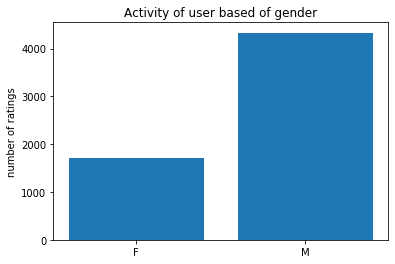

In [17]:
X = gender_active['count']
Y = gender_active['Gender']

plt.bar(Y,X)

plt.ylabel('number of ratings')
plt.title('Activity of user based of gender')

plt.show()

### occupation

In [18]:
occ_active = groupby_count(active_users, 'Occupation', 'count')
occ_active.sort_values(by = 'count', ascending = False)

,Occupation,count
10,grad student,759
14,other,711
8,executive/managerial,679
1,academic,528
7,engineer,502
15,programmer,388
13,marketing,302
20,writer,281
2,artist,267
18,self-employed,241


## grad student watches more movie and rated
## farmers rated least movie


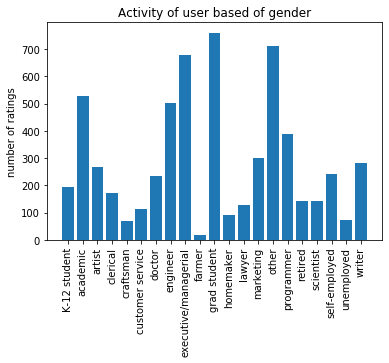

In [19]:
X = occ_active['count']
Y = occ_active['Occupation']
plt.xticks(rotation=90)
plt.bar(Y,X)

plt.ylabel('number of ratings')
plt.title('Activity of user based of gender')

plt.show()

## age

In [20]:
age_active = groupby_count(active_users, 'Age', 'count')
age_active.sort_values(by = 'count', ascending = False)

,Age,count
2,25,2096
3,35,1193
1,18,1103
4,45,550
5,50,496
6,56,380
0,1,222


### 25:  "25-34" are most active 

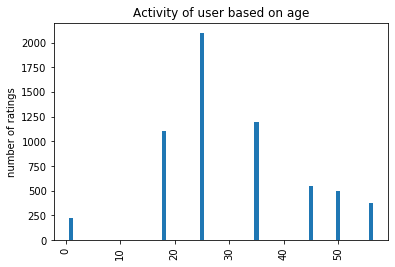

In [21]:
X = age_active['count']
Y = age_active['Age']
plt.xticks(rotation=90)
plt.bar(Y,X)

plt.ylabel('number of ratings')
plt.title('Activity of user based on age')

plt.show()

### Age group
    *  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

In [24]:
age_gender_active = groupby_count(active_users, ['Age','Occupation'], 'count')
age_gender_active.sort_values(by = 'count', ascending = False).head()

,Age,Occupation,count
23,18,grad student,534
47,25,other,298
41,25,executive/managerial,253
61,35,executive/managerial,214
40,25,engineer,202


In [36]:
movie_rating = join(ratings, movies, 'left', 'MovieID')
movie_rating.drop(columns=['Timestamp'],inplace = True)
movie_user_ratings = join(movie_rating, users, 'left', 'UserID')
movie_user_ratings.drop(columns = ['zip_code'], inplace = True)
movie_user_ratings.head()

,UserID,MovieID,Rating,Title,Genre,Gender,Age,Occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,K-12 student
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,K-12 student
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,K-12 student
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,K-12 student
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,K-12 student


## popular movies by age

In [67]:
pop_mov_age = groupby_count(movie_user_ratings, ['Age', 'Title'], 'Rating')
pop_mov_age.reset_index(inplace = True)
#pop_mov_age.set_index('Age', inplace = True)
sorted_pop = pop_mov_age.sort_values(by = 'count', ascending = False)
sorted_pop[sorted_pop['Age']==56].head(10)

,Age,Title,count
19647,56,American Beauty (1999),184
21829,56,Schindler's List (1993),137
21873,56,Shakespeare in Love (1998),136
20611,56,"Godfather, The (1972)",122
21823,56,Saving Private Ryan (1998),121
21461,56,One Flew Over the Cuckoo's Nest (1975),119
20430,56,Fargo (1996),118
22021,56,Star Wars: Episode IV - A New Hope (1977),116
20993,56,L.A. Confidential (1997),116
21897,56,"Silence of the Lambs, The (1991)",116


Timestamp is represented in seconds since the epoch as returned by time(2)

In [33]:
ratings['Timestamp']

0          978300760
1          978302109
2          978301968
3          978300275
4          978824291
5          978302268
6          978302039
7          978300719
8          978302268
9          978301368
10         978824268
11         978301752
12         978302281
13         978302124
14         978301753
15         978302188
16         978824268
17         978301777
18         978301713
19         978302039
20         978302205
21         978300760
22         978300055
23         978824195
24         978300103
25         978824351
26         978301953
27         978300055
28         978824139
29         978824268
             ...    
1000179    956704584
1000180    956715455
1000181    956704972
1000182    957717678
1000183    960971654
1000184    956715569
1000185    956716438
1000186    956704219
1000187    956716294
1000188    964828734
1000189    957716795
1000190    956716113
1000191    964828782
1000192    956703977
1000193    956715288
1000194    964828799
1000195    95